# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata ,study_results ,on ="Mouse ID", how="outer")

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice.
mice_count = mouse_study["Mouse ID"].nunique()
mice_count


249

In [34]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])
dup = mouse_study.loc[duplicate,"Mouse ID"]
dup.unique()

array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_ID_time = mouse_study.loc[mouse_study["Mouse ID"]=="g989",:]
dup_ID_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study['Mouse ID'].isin(dup_ID_time)==False]
clean_mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study["Mouse ID"].nunique()

249

## Summary Statistics

In [52]:
Group_Tumor_Drug = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen'])
mean_Tumor = Group_Tumor_Drug.mean()


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Group_Tumor_Drug = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen'])
mean_Tumor = Group_Tumor_Drug.mean()
median_Tumor = Group_Tumor_Drug.mean().median()
Variance_Tumor = Group_Tumor_Drug.mean().var()
Standar_Tumor = Group_Tumor_Drug.mean().std()
SRM_Tumor = Group_Tumor_Drug.mean().sem()

# Assemble the resulting series into a single summary DataFrame.

Summary_Statistic_TD = pd.DataFrame({"Mean Tumor Volume":mean_Tumor,
                                        "Median Tumor Volume":median_Tumor,
                                        "Tumor Volume Variance":Variance_Tumor,
                                        "Tumor Volume Std. Dev.":Standar_Tumor,
                                         "Tumor Volume Std. Err.":SRM_Tumor})
Summary_Statistic_TD

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,53.060651,31.59938,5.621333,1.777621
Ceftamin,52.591172,53.060651,31.59938,5.621333,1.777621
Infubinol,52.884795,53.060651,31.59938,5.621333,1.777621
Ketapril,55.235638,53.060651,31.59938,5.621333,1.777621
Naftisol,54.331565,53.060651,31.59938,5.621333,1.777621
Placebo,54.033581,53.060651,31.59938,5.621333,1.777621
Propriva,52.322552,53.060651,31.59938,5.621333,1.777621
Ramicane,40.216745,53.060651,31.59938,5.621333,1.777621
Stelasyn,54.233149,53.060651,31.59938,5.621333,1.777621


In [73]:
Group_Tumor_Drug = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen'])
Summary_Statistic = Group_Tumor_Drug.agg(["mean","median","var","std","sem"])
Summary_Statistic

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Rename_Summary_Statistic = Summary_Statistic.rename(columns = {"mean":"Mean-Tumor","median":"Median-Tumor",
                                                               "var":"Variance-Tumor","std":"Std. Dev-Tumor",
                                                              "sem":"Std. Err-Tumor"})
Rename_Summary_Statistic

,Mean-Tumor,Median-Tumor,Variance-Tumor,Std. Dev-Tumor,Std. Err-Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [81]:


St_Drug_Regimen = clean_mouse_study["Drug Regimen"].value_counts()
St_Drug_Regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

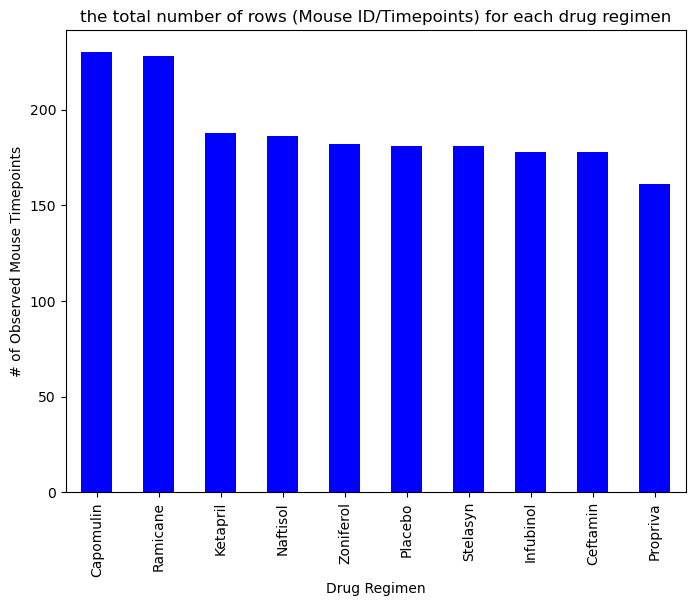

In [80]:
Bar = St_Drug_Regimen.plot(kind="bar", color=["blue"], figsize=(8,6),
                            title="the total number of rows (Mouse ID/Timepoints) for each drug regimen",
                                   xlabel="Drug Regimen",
                                   ylabel="# of Observed Mouse Timepoints")


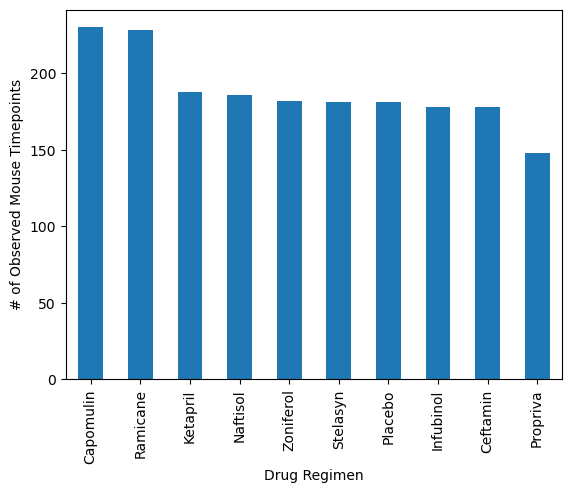

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


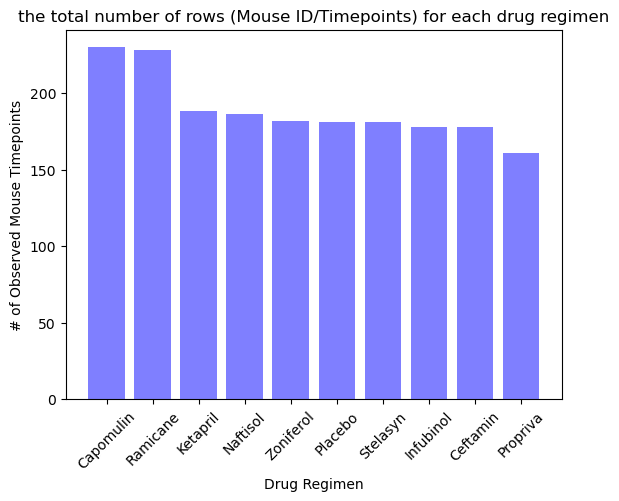

In [82]:
x_axis = St_Drug_Regimen.index.values
y_axis = St_Drug_Regimen.values

plt.bar(x_axis, y_axis, color="blue", alpha=0.5, align="center")
plt.title("the total number of rows (Mouse ID/Timepoints) for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)

plt.show()

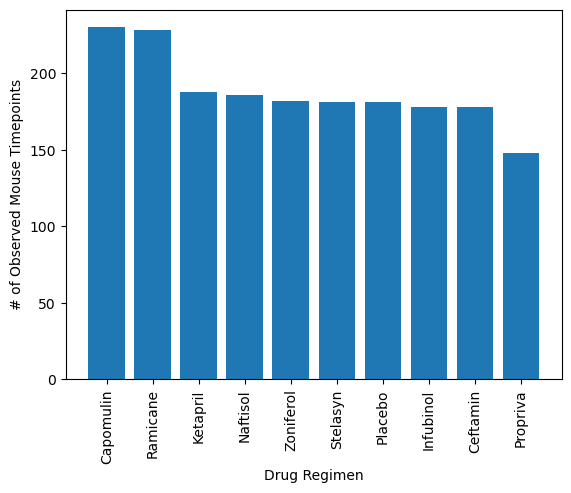

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [83]:
distribution_gender = clean_mouse_study["Sex"].value_counts()
distribution_gender

Male      958
Female    935
Name: Sex, dtype: int64

<Axes: title={'center': 'the distribution of female versus male mice'}, ylabel='Sex'>

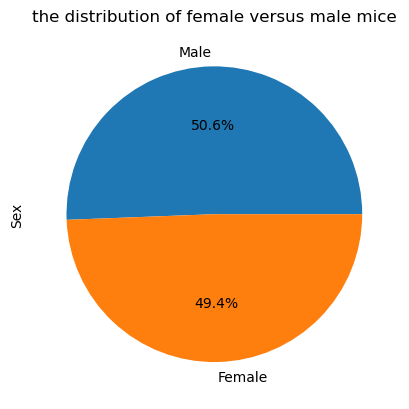

In [84]:
pie = distribution_gender.plot(kind ="pie",autopct= "%1.1f%%", title = "the distribution of female versus male mice")
pie

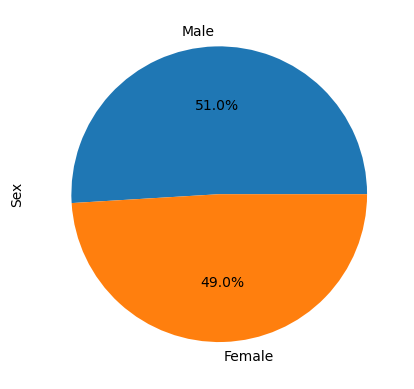

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


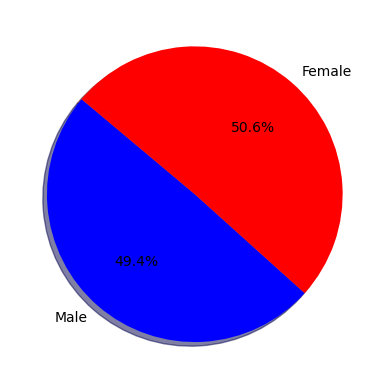

In [94]:
labels = ["Male","Female"]
sizes = [936,957]
colors = ["blue", "red"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

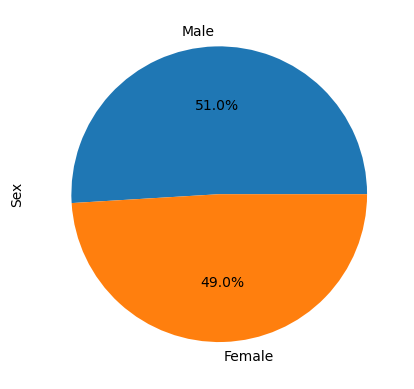

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [102]:
Capomulin_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"]=="Capomulin",:]
Ramicane_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"]=="Ramicane",:]
Infubinol_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"]=="Infubinol",:]
Ceftamin_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"]=="Ceftamin",:]

In [104]:
a=Capomulin_df.max()["Tumor Volume (mm3)"]
b=Ramicane_df.max()["Tumor Volume (mm3)"]
c=Infubinol_df.max()["Tumor Volume (mm3)"]
d=Ceftamin_df.max()["Tumor Volume (mm3)"]

print(a)
print(b)
print(c)
print(d)


48.15820939
47.62281636
72.2267309
68.92318457


In [114]:
Capomulin_greatest = Capomulin_df.groupby('Mouse ID').max()["Timepoint"]
Ramicane_greatest = Ramicane_df .groupby('Mouse ID').max()["Timepoint"]
Infubinol_greatest = Infubinol_df .groupby('Mouse ID').max()["Timepoint"]
Ceftamin_greatest = Ceftamin_df .groupby('Mouse ID').max()["Timepoint"]

In [116]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
Capomulin_greatest_df = pd.DataFrame(Capomulin_greatest )
Capomulin_merge = pd.merge(Capomulin_greatest_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [ ]:
Capomulin_greatest_df = pd.DataFrame(Capomulin_greatest )
Ramicane_greatest_df = pd.DataFrame(Ramicane_greatest)
Infubinol_greatest_df = pd.DataFrame(Infubinol_greatest )
Ceftamin_greatest_df = pd.DataFrame(Ceftamin_greatest )
Capomulin_merge = pd.merge(Capomulin_greatest_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_greatest_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_greatest_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_greatest_df, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")

In [ ]:
# Capomulin,
Capomulin_merge[""]

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


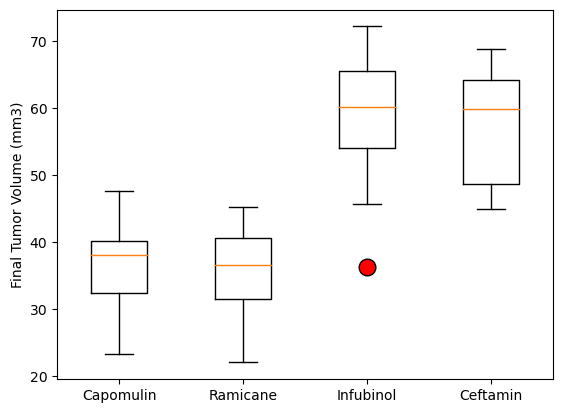

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

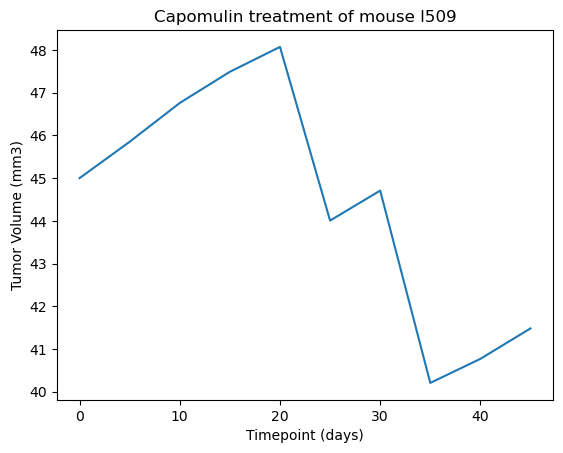

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


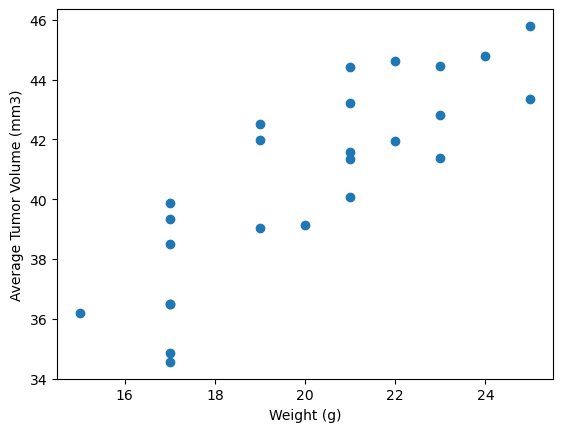

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


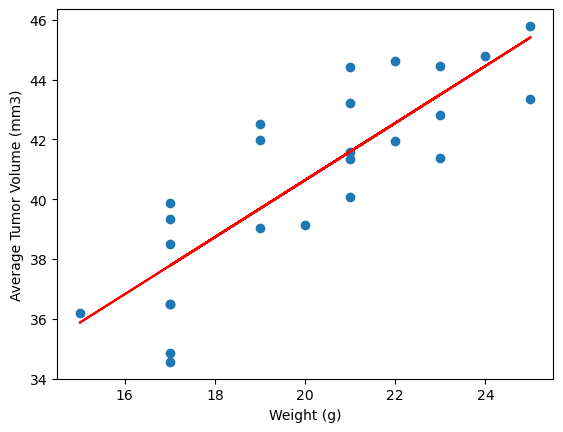

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
